In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

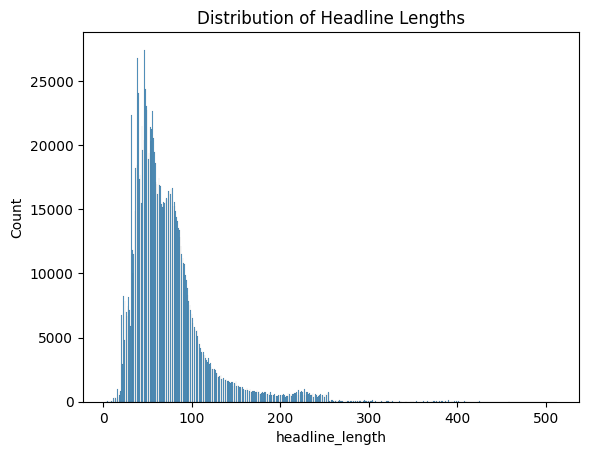

In [6]:
sns.histplot(df['headline_length'])
plt.title("Distribution of Headline Lengths")
plt.show()

In [7]:
import re

df['clean'] = df['headline'].str.lower()
df['clean'] = df['clean'].str.replace(r"[^a-z\s]", "", regex=True)


In [8]:
from collections import Counter

all_words = " ".join(df['clean']).split()
word_freq = Counter(all_words).most_common(20)
word_freq


[('to', 402906),
 ('of', 269814),
 ('on', 245082),
 ('for', 239535),
 ('in', 220612),
 ('the', 212863),
 ('m', 186060),
 ('vs', 162147),
 ('stocks', 161868),
 ('q', 157878),
 ('est', 140606),
 ('eps', 128929),
 ('from', 120713),
 ('shares', 114209),
 ('and', 113439),
 ('reports', 108707),
 ('update', 91680),
 ('market', 90880),
 ('earnings', 87185),
 ('with', 84204)]

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

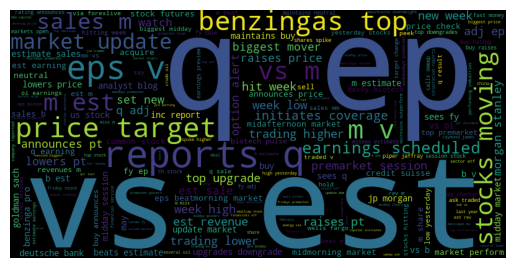

In [9]:
from wordcloud import WordCloud

text = " ".join(df['clean'])
wc = WordCloud(width=800, height=400).generate(text)

plt.imshow(wc)
plt.axis("off")


In [10]:
df['publisher'].value_counts().head(20)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

<Axes: xlabel='publisher'>

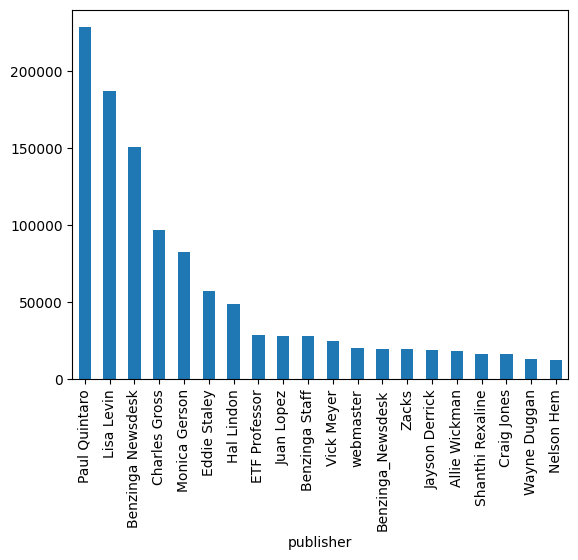

In [11]:
df['publisher'].value_counts().head(20).plot(kind='bar')


In [17]:
df['date'].head(20).tolist()


[datetime.datetime(2020, 6, 5, 10, 30, 54, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 6, 3, 10, 45, 20, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 26, 4, 30, 7, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 12, 45, 6, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 11, 38, 59, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 11, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 9, 36, 20, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 9, 7, 4, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),
 datetime.datetime(2020, 5, 22, 8, 37, 59, tzinfo=datetime.timezone(datetime.timedelta(da

In [19]:
df['date'].apply(type).value_counts()


date
<class 'datetime.datetime'>    1407328
Name: count, dtype: int64

In [20]:
df['date'] = df['date'].apply(lambda x: x.replace(tzinfo=None))


In [21]:
df['date'].apply(type).value_counts()


date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    1407328
Name: count, dtype: int64

<Axes: xlabel='date'>

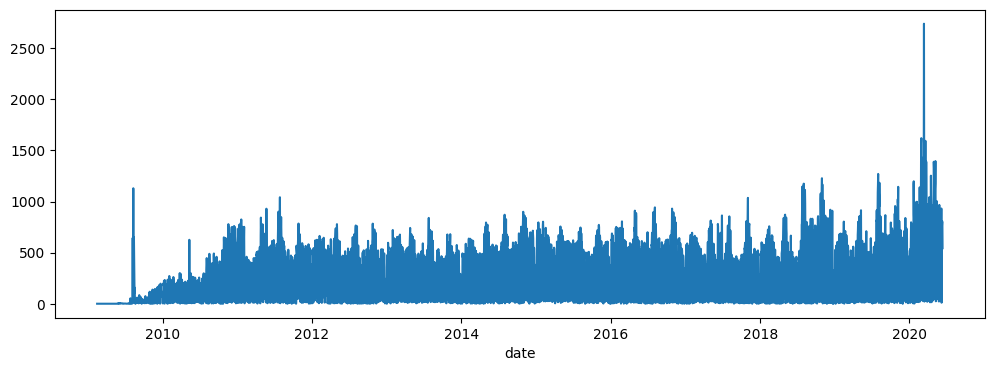

In [22]:
df['date'].dt.date.value_counts().sort_index().plot(figsize=(12,4))
